In [7]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Input
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.models import load_model


# Face Detection Model

In [2]:
data_dir = 'D:\sales project models two\Face Detection Data' 
image_exts = ['jpeg','jpg', 'bmp', 'png']
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Found 616 files belonging to 2 classes.


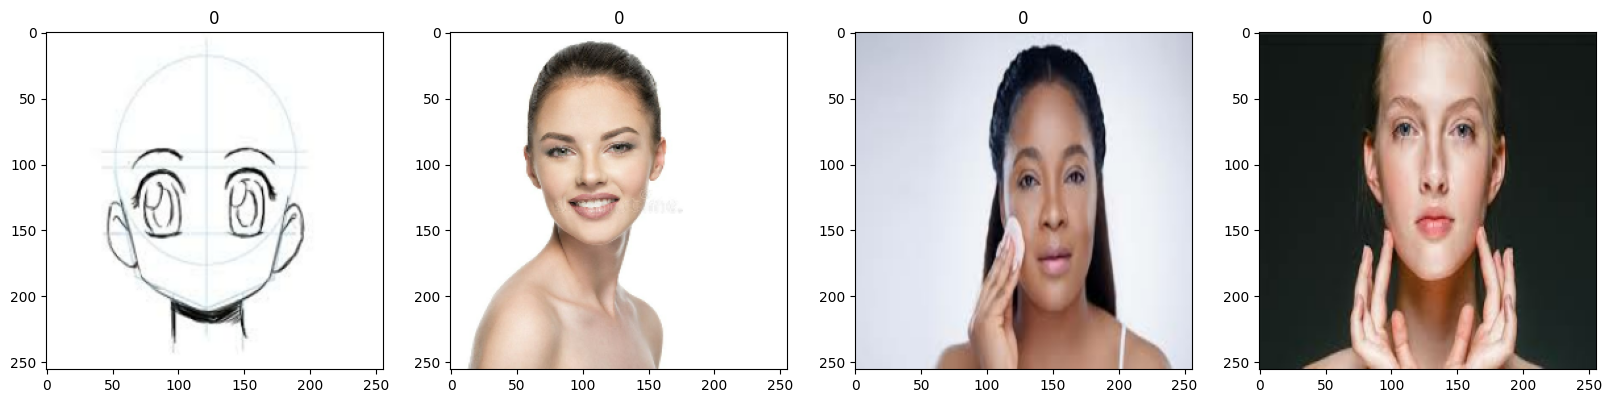

In [3]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])


In [4]:
data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()


(array([[[[0.24751838, 0.16124387, 0.10634191],
          [0.2890625 , 0.20177697, 0.146875  ],
          [0.29304534, 0.20284927, 0.1479473 ],
          ...,
          [0.594424  , 0.6223958 , 0.56078434],
          [0.5814032 , 0.627451  , 0.56951594],
          [0.5768076 , 0.63103557, 0.57254905]],
 
         [[0.25619975, 0.16992523, 0.11502326],
          [0.2920008 , 0.20471527, 0.14981331],
          [0.30036142, 0.21016535, 0.15526338],
          ...,
          [0.59740686, 0.62049633, 0.5626838 ],
          [0.5837924 , 0.6269613 , 0.57000566],
          [0.5787071 , 0.6292993 , 0.57254905]],
 
         [[0.27007267, 0.18324669, 0.12834473],
          [0.29736903, 0.2096742 , 0.15477224],
          [0.31153157, 0.2213355 , 0.16643354],
          ...,
          [0.6019996 , 0.6176083 , 0.56580883],
          [0.5879902 , 0.625337  , 0.57081133],
          [0.5823836 , 0.6268521 , 0.5735572 ]],
 
         ...,
 
         [[0.58469814, 0.349404  , 0.23960009],
          [0.59181

In [5]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [8]:
Facemodel = Sequential()
Facemodel.add(Input(shape=(256, 256, 3)))
Facemodel.add(Conv2D(16, (3,3), 1, activation='relu'))
Facemodel.add(MaxPooling2D())
Facemodel.add(Conv2D(32, (3,3), 1, activation='relu'))
Facemodel.add(MaxPooling2D())
Facemodel.add(Conv2D(16, (3,3), 1, activation='relu'))
Facemodel.add(MaxPooling2D())
Facemodel.add(Flatten())
Facemodel.add(Dense(256, activation='relu'))
Facemodel.add(Dense(1, activation='sigmoid'))
Facemodel.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
Facemodel.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
logdir='logs of Face Detection'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = Facemodel.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])
#Facemodel.save(os.path.join('models','FaceDetectorModel.h5'))



Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 493ms/step - accuracy: 0.7872 - loss: 0.9036 - val_accuracy: 0.7969 - val_loss: 0.4495
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 431ms/step - accuracy: 0.8078 - loss: 0.4131 - val_accuracy: 0.8828 - val_loss: 0.2432
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 553ms/step - accuracy: 0.9212 - loss: 0.2445 - val_accuracy: 0.9141 - val_loss: 0.2315
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 497ms/step - accuracy: 0.9231 - loss: 0.1907 - val_accuracy: 0.9453 - val_loss: 0.1547
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 561ms/step - accuracy: 0.9490 - loss: 0.1507 - val_accuracy: 0.8828 - val_loss: 0.3224
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 574ms/step - accuracy: 0.9076 - loss: 0.2054 - val_accuracy: 0.9531 - val_loss: 0.1156
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 538ms/step - accuracy: 0.9387 - loss: 0.1449 - val_accuracy: 0.8750 - val_loss: 0.3187
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 462ms/step - accuracy: 0.9620 - loss: 0.1279 - val_accuracy: 0

In [ ]:
Facemodel.save(os.path.join('models','FaceDetectorModel.keras'))

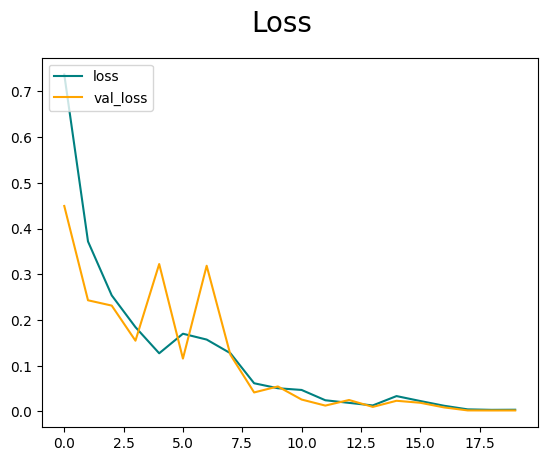

In [10]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

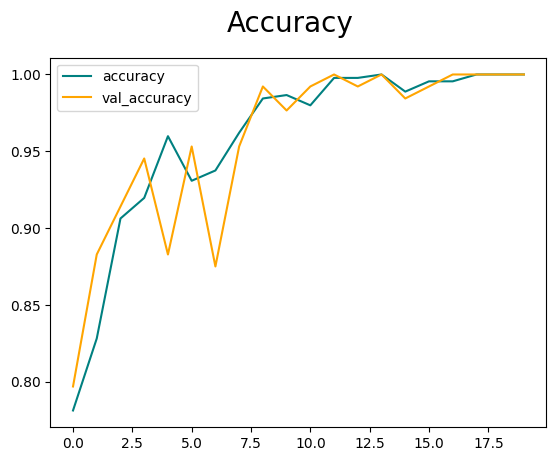

In [11]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [12]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = Facemodel.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)


print("The Precision = {}  ,The Recall = {}  ,The BinaryAccuracy = {}   ".format(pre.result(), re.result(), acc.result()))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
The Precision = 1.0  ,The Recall = 1.0  ,The BinaryAccuracy = 1.0   
